<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reading data</a></span><ul class="toc-item"><li><span><a href="#Since-we-got-the-information-of-the-label-column,-we-will-drop-in-order-to-have-only-pixel-information" data-toc-modified-id="Since-we-got-the-information-of-the-label-column,-we-will-drop-in-order-to-have-only-pixel-information-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Since we got the information of the label column, we will drop in order to have only pixel information</a></span></li><li><span><a href="#We-need-to-check-if-our-sample-is-well-distributed,-so-we-plot-a-histogram-of-our-labels" data-toc-modified-id="We-need-to-check-if-our-sample-is-well-distributed,-so-we-plot-a-histogram-of-our-labels-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>We need to check if our sample is well distributed, so we plot a histogram of our labels</a></span></li></ul></li><li><span><a href="#Checking-if-the-data-is-normalized" data-toc-modified-id="Checking-if-the-data-is-normalized-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking if the data is normalized</a></span><ul class="toc-item"><li><span><a href="#So-the-max-value-is-255,-we-will-rescale-our-data-to-this-value" data-toc-modified-id="So-the-max-value-is-255,-we-will-rescale-our-data-to-this-value-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>So the max value is 255, we will rescale our data to this value</a></span></li><li><span><a href="#Now-the-data-is-normalized" data-toc-modified-id="Now-the-data-is-normalized-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Now the data is normalized</a></span></li><li><span><a href="#We-have-to-use-one-hot-encoding-for-our-data-in-order-to-match-the-output-of-our-Neural-Network" data-toc-modified-id="We-have-to-use-one-hot-encoding-for-our-data-in-order-to-match-the-output-of-our-Neural-Network-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>We have to use one hot encoding for our data in order to match the output of our Neural Network</a></span><ul class="toc-item"><li><span><a href="#So-now-our-labels-will-be-arrays-corresponding-to-a-number" data-toc-modified-id="So-now-our-labels-will-be-arrays-corresponding-to-a-number-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>So now our labels will be arrays corresponding to a number</a></span></li></ul></li></ul></li><li><span><a href="#Format-of-the-images" data-toc-modified-id="Format-of-the-images-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Format of the images</a></span><ul class="toc-item"><li><span><a href="#Separating-the-training-and-verification-data" data-toc-modified-id="Separating-the-training-and-verification-data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Separating the training and verification data</a></span></li></ul></li></ul></li><li><span><a href="#Build-our-model" data-toc-modified-id="Build-our-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build our model</a></span><ul class="toc-item"><li><span><a href="#Using-a-Beta-VAE" data-toc-modified-id="Using-a-Beta-VAE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using a Beta-VAE</a></span></li></ul></li></ul></div>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import tensorflow as tf
import os
from datetime import datetime
import functools
%matplotlib inline
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

/home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nahum/anaconda3/envs/generative

['test.csv', '.ipynb_checkpoints', 'train.csv']


/home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nahum/anac

# EDA

## Reading data

In [6]:
train_imgs = pd.read_csv("input/train.csv")
test_imgs = pd.read_csv("input/test.csv")

In [7]:
label_train = train_imgs["label"]

### Since we got the information of the label column, we will drop in order to have only pixel information

In [8]:
img_train = train_imgs.drop(labels= "label", axis = 1)
del train_imgs

### We need to check if our sample is well distributed, so we plot a histogram of our labels

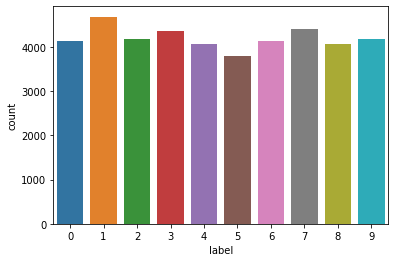

In [9]:
sns.countplot(label_train)

We have a well distributed sample

## Checking if the data is normalized

In [10]:
img_train.max().max()

255

In [11]:
test_imgs.max().max()

255

### So the max value is 255, we will rescale our data to this value

In [12]:
img_train = img_train/255.
test_imgs = test_imgs/255.

### Now the data is normalized

In [13]:
print(img_train.max().max())
print(test_imgs.max().max())

1.0
1.0


### We have to use one hot encoding for our data in order to match the output of our Neural Network

In [14]:
label_train = keras.utils.to_categorical(label_train, num_classes= 10)

#### So now our labels will be arrays corresponding to a number

In [15]:
label_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Format of the images

In [16]:
img_train = img_train.values
test_imgs = test_imgs.values

### Separating the training and verification data

In [17]:
train_x , test_x , train_y , test_y = train_test_split(img_train , label_train , 
                                            test_size = 0.2 ,
                                            random_state = 42)

In [18]:
train_x[0].shape

(784,)

In [19]:
n_samples = train_x[0].shape[0]

# Build our model

## Using a Beta-VAE

from: https://jmetzen.github.io/2015-11-27/vae.html

see also: https://github.com/oduerr/dl_tutorial/blob/master/tensorflow/vae/vae_demo.ipynb

In [20]:
from Models.VAE_TF import B_VariationalAutoencoder_Tensorflow, train
from Helper_Functions.Data_Manipulation import Dataset

In [21]:
train_dataset = Dataset(train_x)
test_dataset = Dataset(test_x)
testy_dataset = Dataset(test_y)

In [23]:
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=20)  # dimensionality of latent space

vae,cost = train(network_architecture,train_dataset, training_epochs=1, beta=2)

beta= 2


/home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 cost= 203.727670987


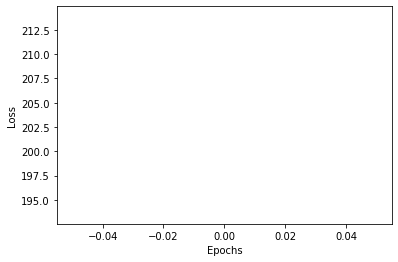

In [24]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

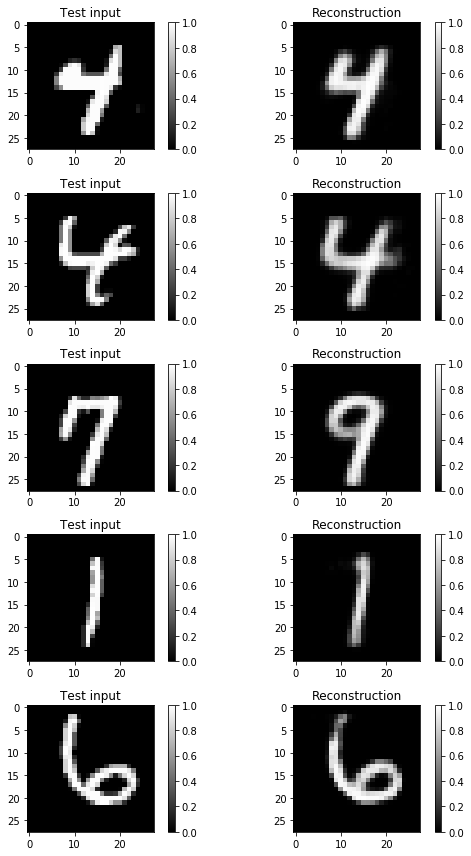

In [20]:
x_sample = test_dataset.next_batch(100)
x_reconstruct = vae.reconstruct(x_sample)

plt.figure(figsize=(8, 12))
for i in range(5):

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
    
plt.tight_layout()

In [2]:
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=2)  # dimensionality of latent space

vae_2d ,cost = train(network_architecture,train_dataset, training_epochs=1, beta=2)

NameError: name 'train' is not defined

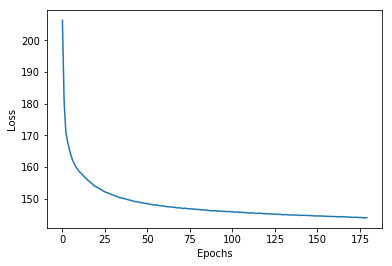

In [26]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

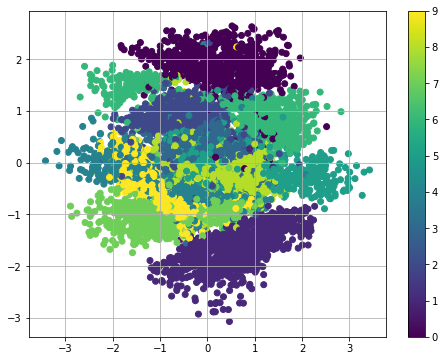

In [27]:
#x_sample, y_sample = test_dataset.next_batch(5000), testy_dataset.next_batch(5000)
z_mu = vae_2d.transform(test_x)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(test_y, 1))
plt.colorbar()
plt.grid()

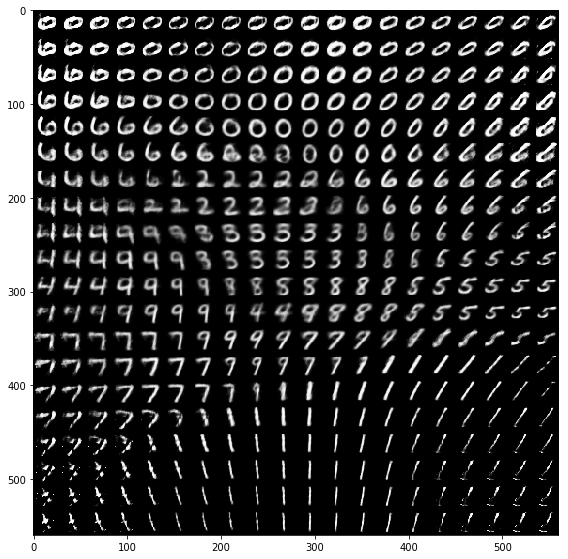

In [28]:
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*vae.batch_size)
        x_mean = vae_2d.generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper", cmap="gray")
plt.tight_layout()